### Data Details

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level: Educational Qualification of the account holder
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio

In [17]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
#from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline, make_pipeline

# Libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Library to build a logistic regression model
from sklearn.linear_model import LogisticRegression

# Library to impute missing values if is necessary
#from sklearn.impute import KNNImputer

In [18]:
# Library to supress the warning
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Loading dataset
data = pd.read_csv('ProjBankChurners.csv')

In [20]:
bc=data.copy()

### Checking Data

In [21]:
bc.shape

(10127, 21)

In [22]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

- The rows on this data are complete
- We can transform object type into category

In [124]:
bc.values

array([[768805383, 'Existing Customer', 45, ..., 42, 1.625, 0.061],
       [818770008, 'Existing Customer', 49, ..., 33, 3.714, 0.105],
       [713982108, 'Existing Customer', 51, ..., 20, 2.333, 0.0],
       ...,
       [716506083, 'Attrited Customer', 44, ..., 60, 0.818, 0.0],
       [717406983, 'Attrited Customer', 30, ..., 62, 0.722, 0.0],
       [714337233, 'Attrited Customer', 43, ..., 61, 0.649,
        0.18899999999999997]], dtype=object)

In [125]:
bc.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [126]:
bc.index

RangeIndex(start=0, stop=10127, step=1)

### Checking Missing Values

In [127]:
bc.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [128]:
bc.isnull().values.any() # If there are any null values in data set

False

The columns are not shows null values

In [129]:
## Dropping columns which are not adding any information.
bc.drop(['CLIENTNUM'],axis=1,inplace=True)

In [130]:
## Check Summary 
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


### Observations: 
- Customer Age: Min Age is 26 and Max Age 73 
- Average of Dependent_count 2.34
- Period of relationship with the bank average is 35 months
- Customer can held an avarage of almost 4 products
- Number of months inactive is considered low
- Customer contact also is considered low volume, with 2.45 average a year. 
- The credit limit is inside a range between: 1438 and 34516
- Total revolving balance in the CC is inside a range between 00 to 2517
- In the past 12 months the average of Open to Buy Credit Line is 7469
- Total transaction amount min of 510 and Max of 18484
- Clients process an average of ~65 transactions a year with expending of ~4404


In [131]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


### Observations
- Attrition Falg is showing: Existing Customer 8500 and Attrited Customer 1627
- Gender: Female 5358 and Male 4769 
- Education Level: Most customers are graduates
- Marital Status: Most customers are Married followed by Singles
- Income Category: Most of customer makes less than $40K
- Card Category: Most of customer are considered Blue



### Fixing Data

In [23]:
cols = bc.select_dtypes(['object'])
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [24]:
for i in cols.columns:
    bc[i] = bc[i].astype('category')

In [25]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null category
Customer_Age                10127 non-null int64
Gender                      10127 non-null category
Dependent_count             10127 non-null int64
Education_Level             10127 non-null category
Marital_Status              10127 non-null category
Income_Category             10127 non-null category
Card_Category               10127 non-null category
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 

## EDA: Univariate analysis

In [16]:
#Building boxplot and histogram for any input numerical variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    

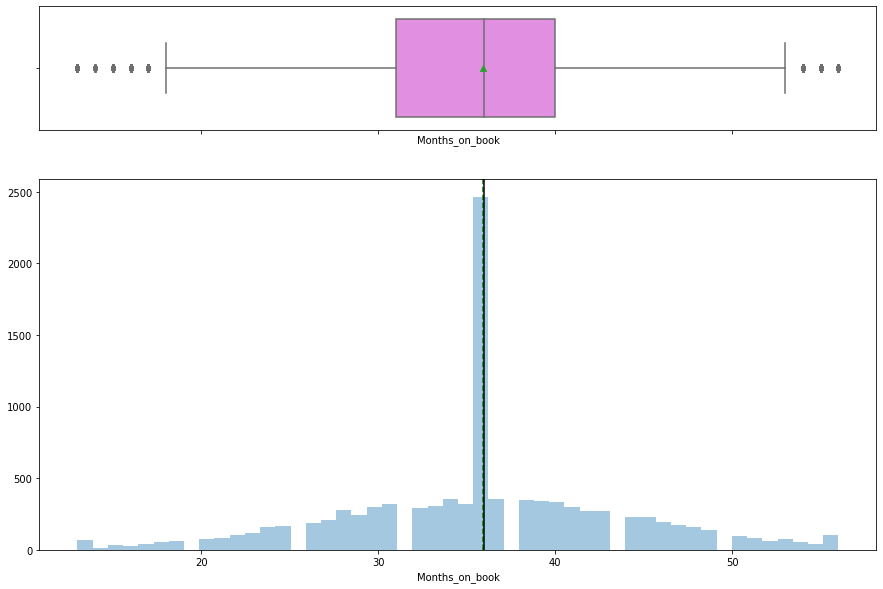

In [19]:
# Observations on Months on the book
histogram_boxplot(bc['Months_on_book'])

- Distribution of Months_on_book shows left and right skewed.

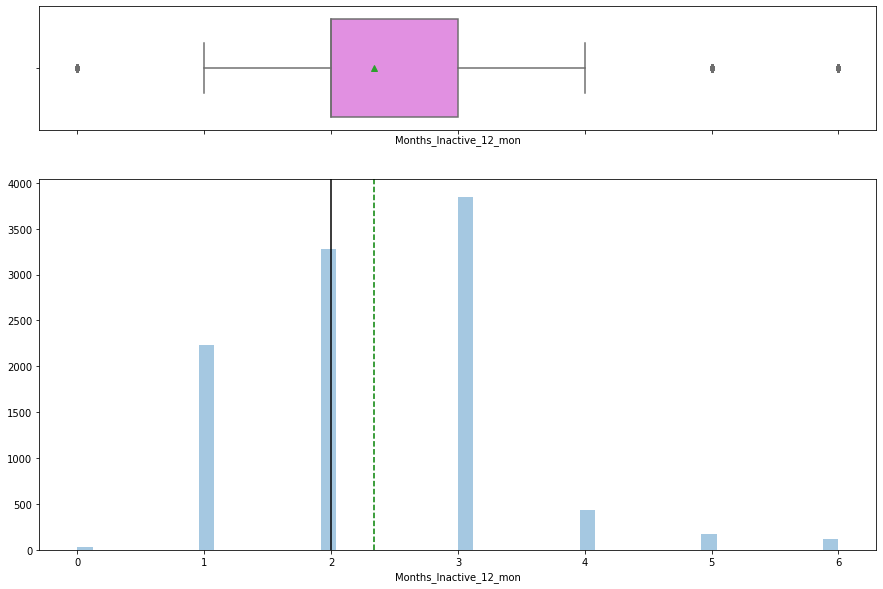

In [20]:
# Observations on Months_Inactive_12_mon
histogram_boxplot(bc['Months_Inactive_12_mon'])

- Its not showing large skewed.

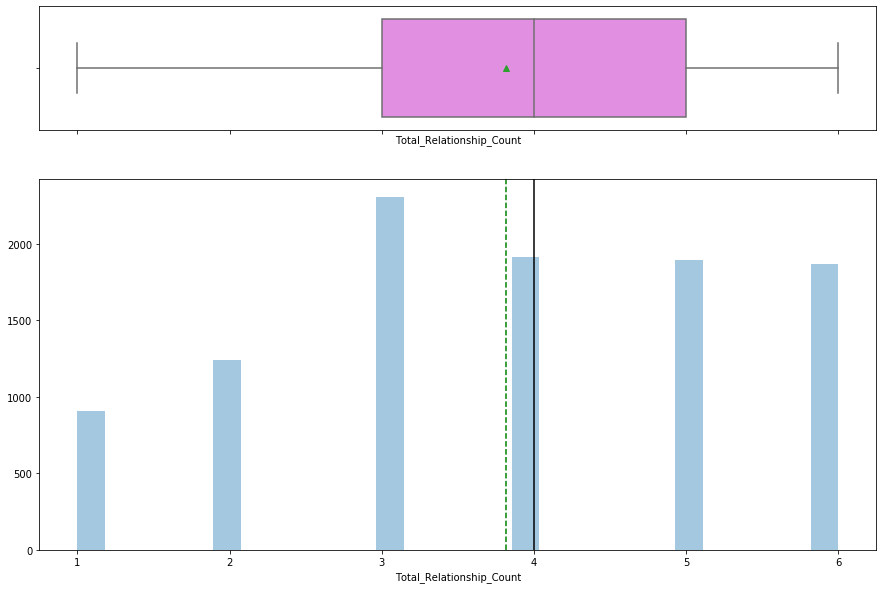

In [21]:
# Observations on Total_Relationship_Count
histogram_boxplot(bc['Total_Relationship_Count'])

Is not showing skewed.

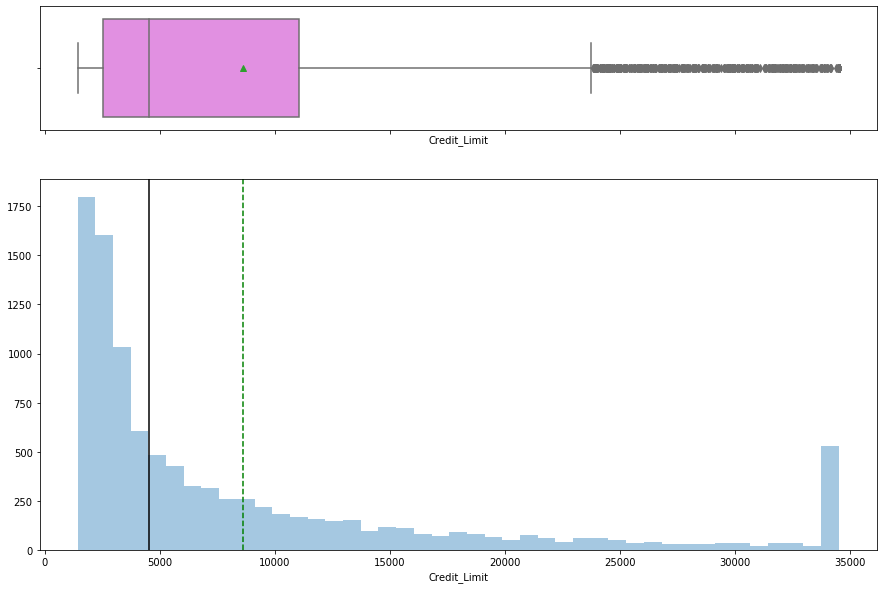

In [22]:
# Observations on Credit Limited
histogram_boxplot(bc['Credit_Limit'])

- Distribution of Credit_Limit' is right-skewed with many outliers.
- From the boxplot, we can see more than ~20000 of training are outlliers.

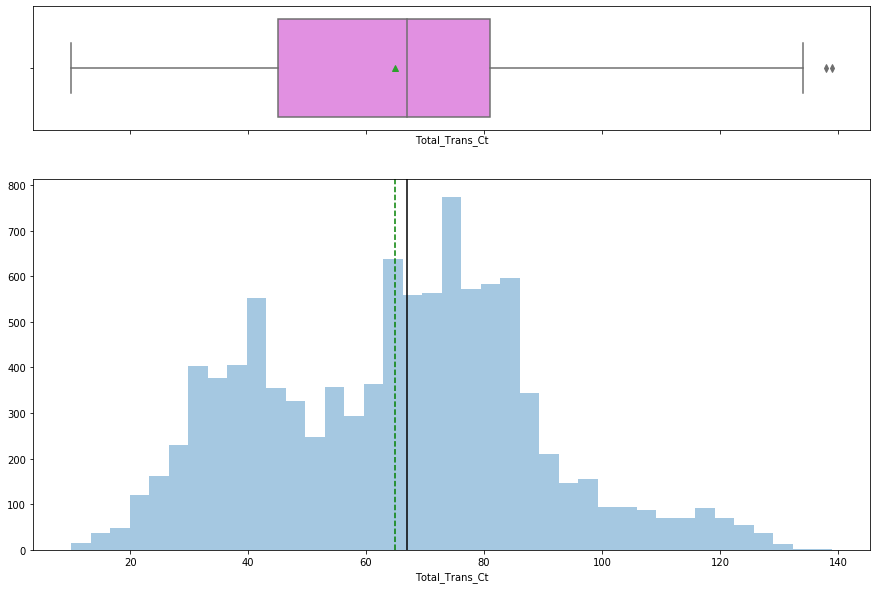

In [23]:
# Observations on Total_Trans_Ct
histogram_boxplot(bc['Total_Trans_Ct'])

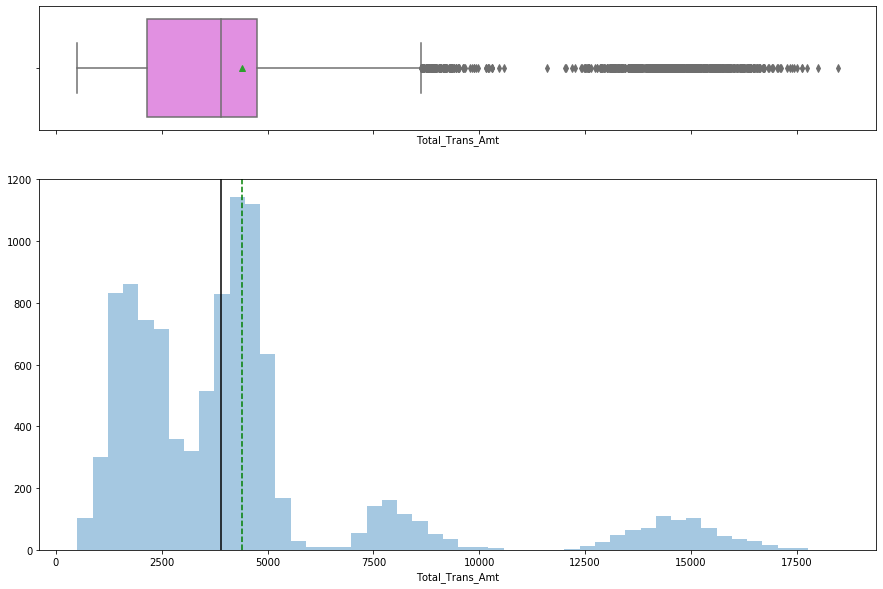

In [24]:
# Observations on Total_Trans_Amt
histogram_boxplot(bc['Total_Trans_Amt'])


- Distribution of  Total_Trans_Amt is right-skewed with many outliers.
- From the boxplot, we can see more than ~7500 of outlliers.

In [26]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

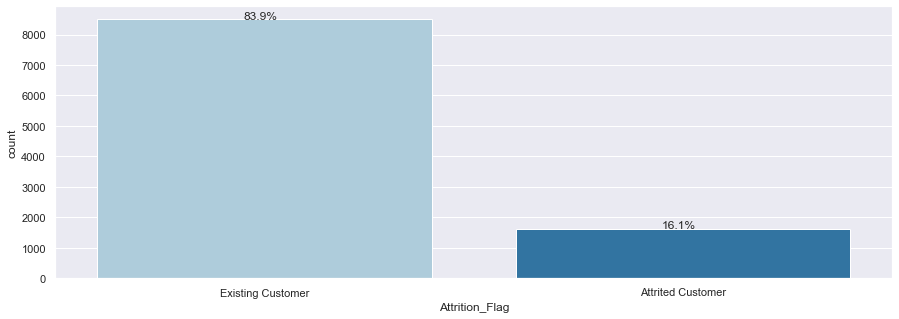

In [136]:
# Observations on Attrition_Flag
perc_on_bar('Attrition_Flag')

- 16.1% of the customer no longer is working with the bank

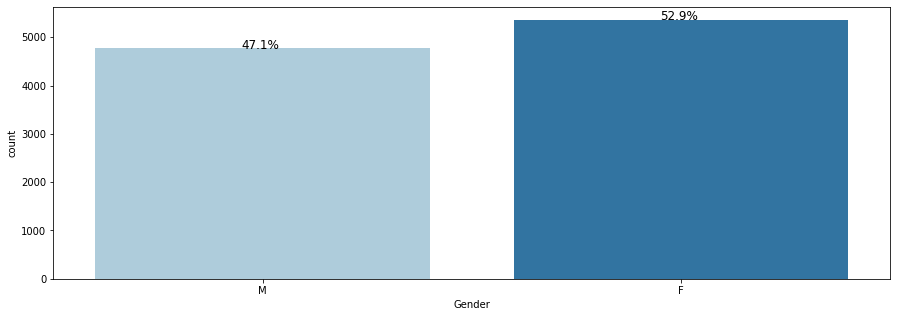

In [27]:
# Observations on Gender
perc_on_bar('Gender')

- Women represents the majority of the account holders

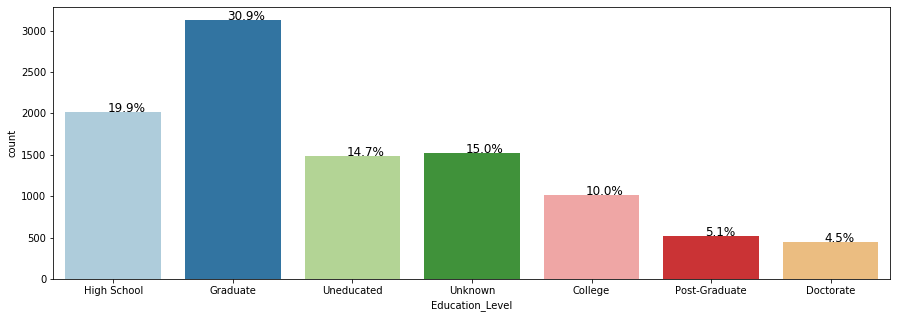

In [28]:
# Observations on Education_Level
perc_on_bar('Education_Level')

- Graduated represents the majority of the account holders

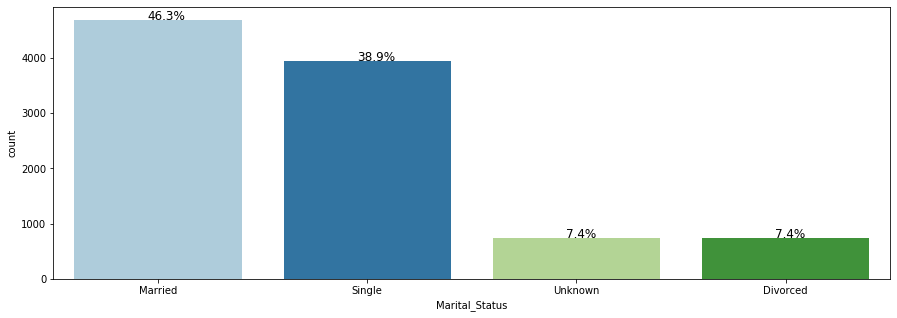

In [29]:
# Observations on Marital_Status
perc_on_bar('Marital_Status')

- As we were able to review above, Married status represents the majority of the account holders

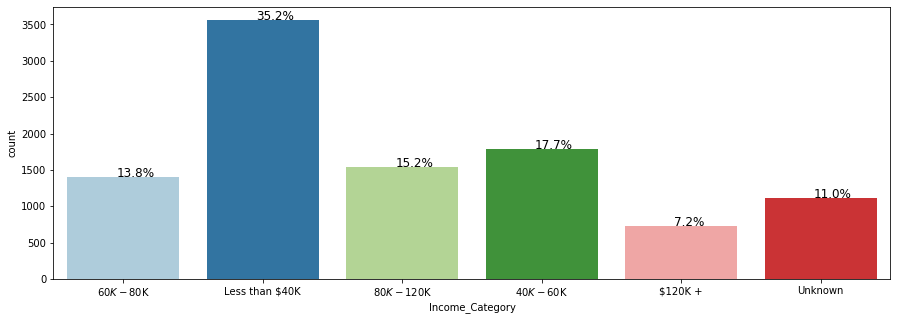

In [27]:
# Observations on Income_Category
perc_on_bar('Income_Category')

- Important to check that 35% of the account holders make less than $40000
- But 15% makes 80000 - 120000

In [28]:
bc = bc.replace('Unknown', np.nan)
#df.col.fillna(df.col.median(),inplace=True) #
bc.Income_Category.fillna('40k-60k',inplace=True)

ValueError: fill value must be in categories

In [15]:
# Observations on Income_Category
perc_on_bar('Income_Category')

NameError: name 'perc_on_bar' is not defined

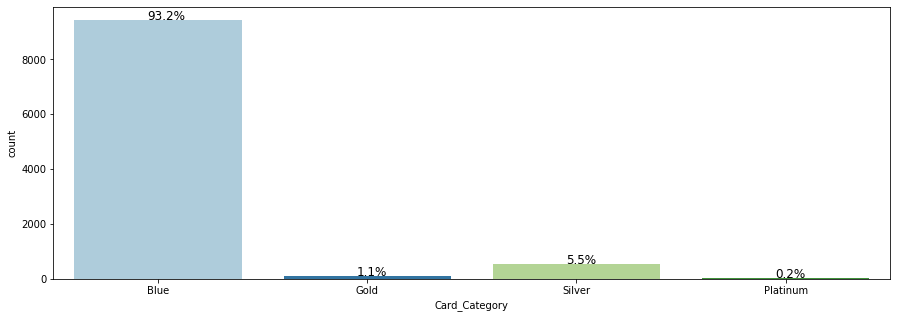

In [31]:
# Observations on Card_Category
perc_on_bar('Card_Category')

In [ ]:
df[col].value_count

- A large number of customers are concentrated in only one category: Blue

## EDA: Bivariate analysis

In [32]:
## Function to plot stacked bar chart
# The intention is to verify the correlation between the population that is working or not with the bank with all other values
def stacked_plot(x):
    sns.set(palette='coolwarm')
    tab1 = pd.crosstab(x,bc['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,bc['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


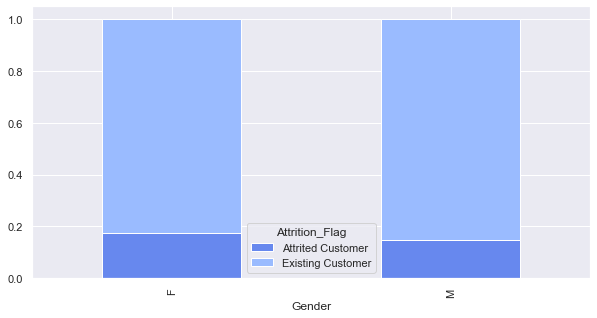

In [33]:
# Checking the Gender of the population with the Attrition Variable
stacked_plot(bc['Gender'])

- The number of females that is no longer client is bigger than Male

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


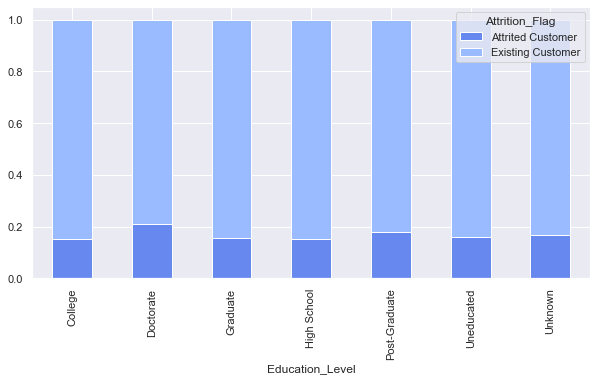

In [34]:
# Checking the Education_Level of the population with the Attrition Variable
stacked_plot(bc['Education_Level'])

- Checking Education Level, the Doctorate level give up being a customer of the bank

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


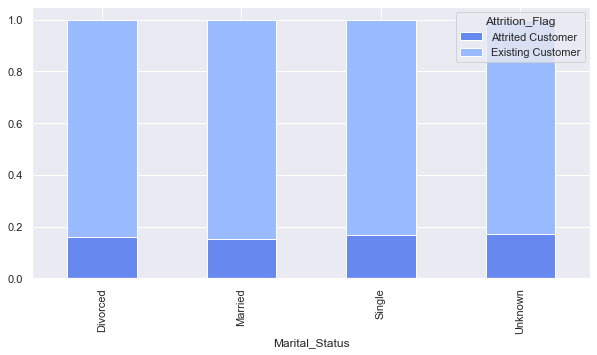

In [35]:
# Checking the Marital_Statusl of the population with the Attrition Variable
stacked_plot(bc['Marital_Status'])

- Each Marital status follows the same standard, as for existing and nonexistent customers

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


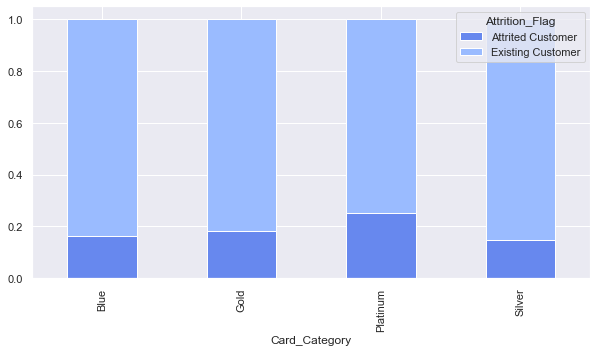

In [36]:
# Checking the Card_Category of the population with the Attrition Variable
stacked_plot(bc['Card_Category'])

- It shows here that there was a loss of Platinum customers

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


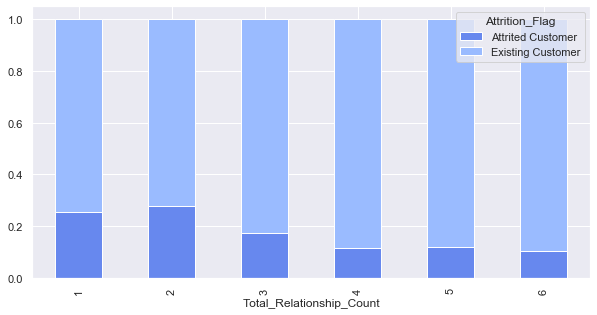

In [37]:
# Checking the Total_Relationship_Count of the population with the Attrition Variable
stacked_plot(bc['Total_Relationship_Count'])

- Former customers had 1 to 2 products.

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


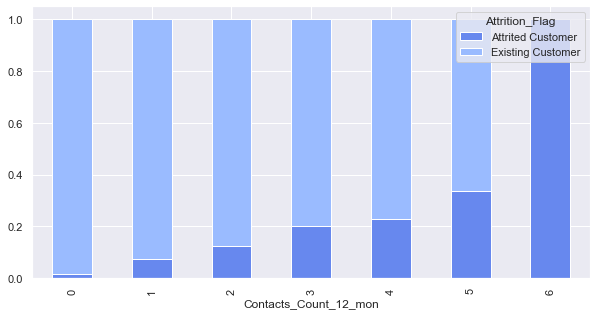

In [38]:
# Checking the Contacts_Count_12_mon of the population with the Attrition Variable
stacked_plot(bc['Contacts_Count_12_mon'])

- A large amount of contact related to the population that is no longer client could be clients that had difficulty finding a solution to their issue

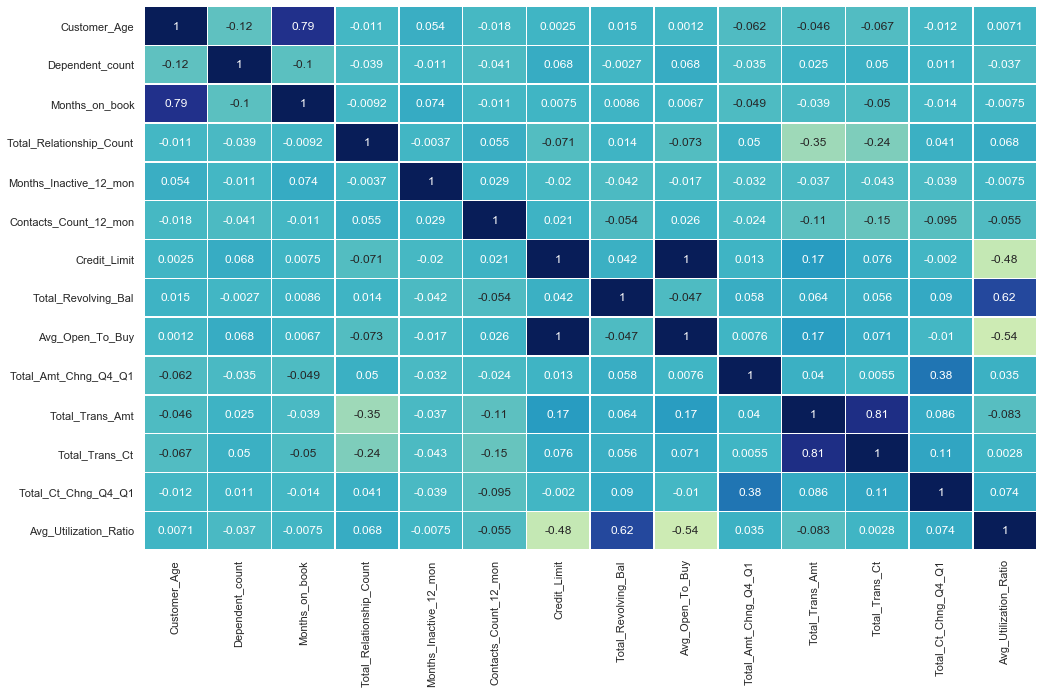

In [39]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(bc.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Here we can see relation ship between, as expected: 
- Age and lealty (Months on book)
- Avg Utilization and Total Revolving
- Total Transactions amount and Total transacton count

In [40]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
Attrition_Flag              10127 non-null category
Customer_Age                10127 non-null int64
Gender                      10127 non-null category
Dependent_count             10127 non-null int64
Education_Level             10127 non-null category
Marital_Status              10127 non-null category
Income_Category             10127 non-null category
Card_Category               10127 non-null category
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64
Total_Trans_Ct              10127 

### Split the data into train and test sets

In [137]:
#Separating Attrition_Flag variable and other variables
X = bc.drop(['Attrition_Flag'],axis=1)
y = bc['Attrition_Flag'].apply(lambda x : 0 if x=='Existing Customer' else 1)

In [138]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1,stratify=y)

In [139]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 32) (3039, 32)


In [140]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bc.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bc.index)) * 100))

69.99% data is in training set
30.01% data is in test set


### Functions to Calculate all Scores

In [141]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [142]:
##  Function to calculate recall score - Minimize False Positive
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [143]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [144]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [145]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Building the model

>"“Was presented several Python issues while importing Xgboost and Imlearn. 
Since I was unable to import using the actual Jupyter, I had to use another Python system to run only the codes that weren't enabled to import in this interface. I placed the output results using markdown cells. Still, I have all scores. Alice”"

### Model evaluation criterion:

Build a classification model to predict if the customer is going to churn or not
1. Predicting a customer is going to churn, but in reality customer will not to churn - Loss of all work made
2. Predicting a customer is not going to churn, but the customer is going to churn - Loss of good possibilities.


#### Which case is more important? 
Predicting a customer is not going to churn, but the customer is going to churn - Loss of good clients

#### Focus to reduce false negative

In [68]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 59.089960584280085
RF: 71.11871087410155
GBM: 83.84689697812814
ADB: 81.74124739160676
DTREE: 79.37050776721539


## Model 1: Logistic Regression

In [51]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

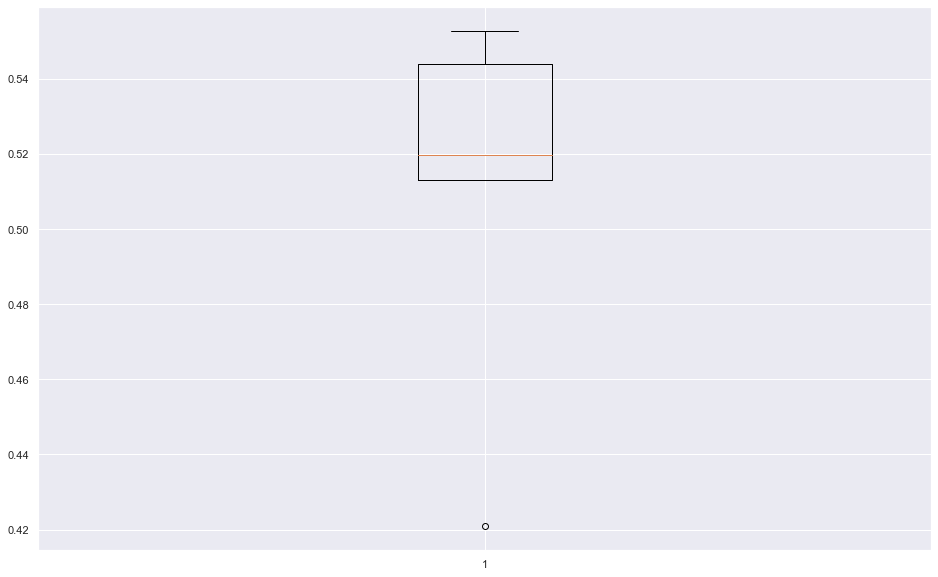

In [52]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training set varies between 0.50 to 0.55 recall.

Accuracy on training set :  0.8910835214446953
Accuracy on test set :  0.8920697597894044
Recall on training set :  0.495171202809482
Recall on test set :  0.48975409836065575
Precision on training set :  0.7411300919842313
Precision on test set :  0.7515723270440252


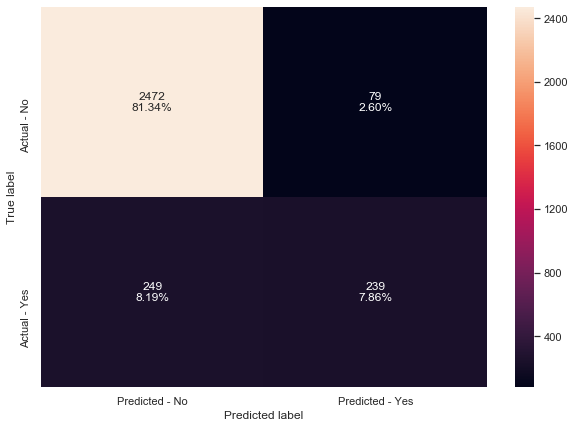

In [53]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

- Logistic Regression has given a generalized performance on training and test set.
- Training and Test are very similar in Accuracy, Recall and Precision.

### Oversampling train data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 32)
After UpSampling, the shape of train_y: (11898,) 

### Logistic Regression on Oversampled Data

In [ ]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

Accuracy on training set :  0.8489662128088754
Accuracy on test set :  0.8216518591641987
Recall on training set :  0.8537569339384771
Recall on test set :  0.8176229508196722
Precision on training set :  0.8456543456543456
Precision on test set :  0.46830985915492956

### Regularization 

In [ ]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy on training set :  0.7106236342242394
Accuracy on test set :  0.782494241526818
Recall on training set :  0.5822827365943856
Recall on test set :  0.5266393442622951
Precision on training set :  0.783355947535052
Precision on test set :  0.37409024745269287

### Undersampling train data using SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 32)
After Under Sampling, the shape of train_y: (2278,) 


### Logistic Regression on undersampled data

In [ ]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

Accuracy on training set :  0.8397717295873574
Accuracy on test set :  0.8374465284633102
Recall on training set :  0.8384547848990342
Recall on test set :  0.8463114754098361
Precision on training set :  0.840669014084507
Precision on test set :  0.4963942307692308

In [ ]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

In [ ]:
### Model	Test_Accuracy	Test_Precision	Test_Recall	Train_Accuracy	Train_Precision	Train_Recall
- Logistic Regression 	0.892070 -	0.751572 - 	0.489754 -	0.891084 - 	0.742404 - 	0.493415
- Logistic Regression on Oversampled data	0.821652 - 0.468310 - 	0.817623 - 	0.848966 - 	0.845654 - 	0.853757
- Logistic Regression-Regularized (Oversampled d...	0.782494 - 	0.374090 -	0.526639 -	0.710624 -	0.783356 -	0.582283
- Logistic Regression on Undersampled data	0.837447 -	0.496394 -	0.846311 -	0.839772 -	0.840669 - 	0.838455

## Model 2: Decision Tree

In [70]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

Accuracy on training set :  1.0
Accuracy on test set :  0.9378084896347483
Recall on training set :  1.0
Recall on test set :  0.8278688524590164
Precision on training set :  1.0
Precision on test set :  0.793713163064833


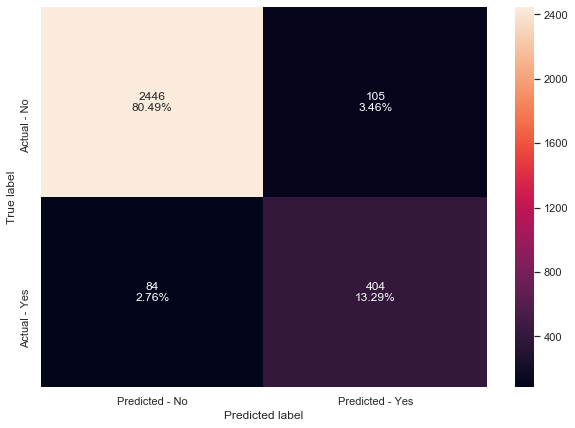

In [71]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

- The model is overfiting the training data as training set is higher than test set.

## Model 3: Random Forest Classifier

Accuracy on training set :  0.9966139954853274
Accuracy on test set :  0.9420862125699243
Recall on training set :  0.9824407374890255
Recall on test set :  0.7151639344262295
Precision on training set :  0.9964381121994658
Precision on test set :  0.9041450777202072


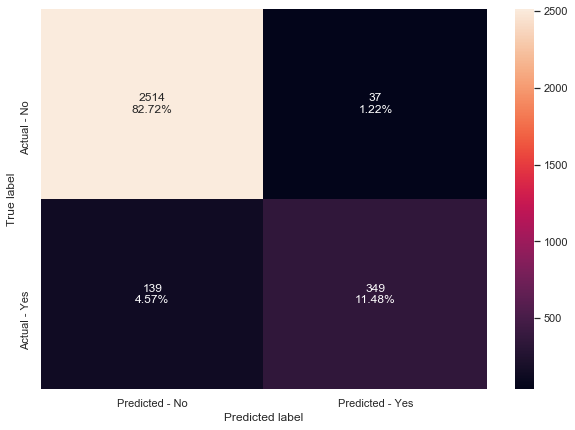

In [72]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

- With default parameters, random forest is performing better than decision tree in terms of precision and recall.
- Training set and Test set are very similar

## Model 4: Bagging Classifier

Accuracy on training set :  0.996331828442438
Accuracy on test set :  0.9598552155314248
Recall on training set :  0.9806848112379281
Recall on test set :  0.8401639344262295
Precision on training set :  0.9964317573595004
Precision on test set :  0.9030837004405287


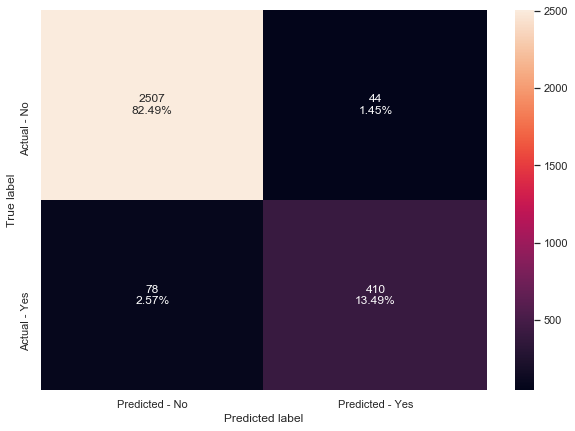

In [74]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

- With default parameters, random forest is performing better than decision tree in terms of precision and recall.
- Training set and Test set are very similar

## Model 5: AdaBoost Classifier

Accuracy on training set :  0.9571106094808126
Accuracy on test set :  0.9565646594274433
Recall on training set :  0.8410886742756805
Recall on test set :  0.8483606557377049
Precision on training set :  0.8862164662349676
Precision on test set :  0.8771186440677966


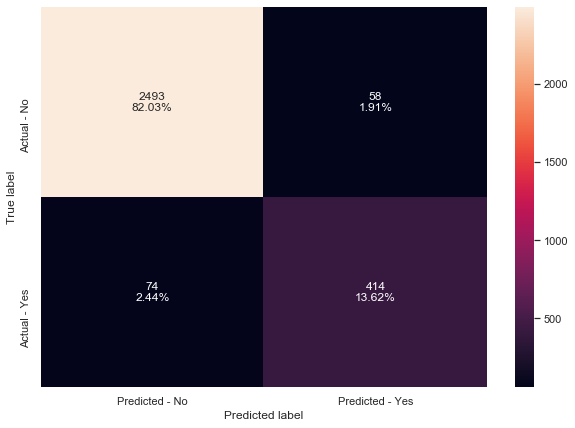

In [76]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

- Just like the two model above, this model is not overfitting the data and is giving good recall on training and test data.

## Model 6: Gradient Boosting Classifier

Accuracy on training set :  0.975451467268623
Accuracy on test set :  0.9664363277393879
Recall on training set :  0.8884986830553117
Recall on test set :  0.8647540983606558
Precision on training set :  0.95561850802644
Precision on test set :  0.9213973799126638


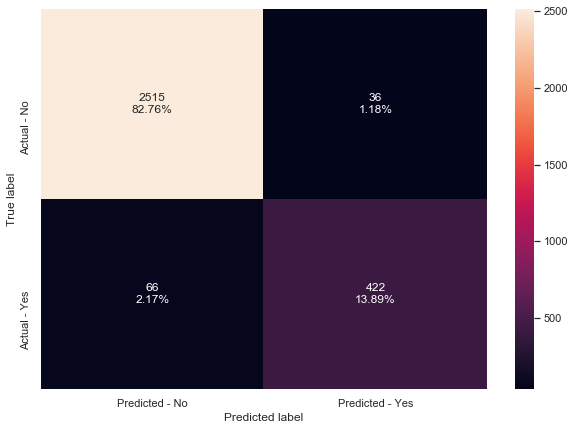

In [77]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

- The model is not overfitting the training data in terms of recall and precision but is giving very good recall on training and test data.
- The recall is slightly better as compared to AdaBoost with default parameters.

## Model 7:  XGBoost Classifier 

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

Accuracy on training set :  0.9746049661399548
Accuracy on test set :  0.9670944389601843
Recall on training set :  0.8805970149253731
Recall on test set :  0.860655737704918
Precision on training set :  0.9579751671442216
Precision on test set :  0.9292035398230089

- With default parameters, the model is not overfitting the training data.
- The model has very similar results as the Gradient Boosting Classifier.

# Lets choose the best 3 Models to Tunning: 
#### Model 4: Bagging Classifier 
#### Model 5: Ada Boost 
#### Model 6: Gradient Boosting

## Reasons: 
- Models are not overfitting
- Shows balance in terms of recall
- Shows High Precision and recall

### Ada Boost - GridSearch CV

In [82]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best'), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.876178618214972
Wall time: 10min 44s


In [83]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=2,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                                                                          min_samples_leaf=1,
                 

Accuracy on training set :  0.9954853273137697
Accuracy on test set :  0.9697268838433696
Recall on training set :  0.9841966637401229
Recall on test set :  0.9016393442622951
Precision on training set :  0.9876651982378855
Precision on test set :  0.9090909090909091


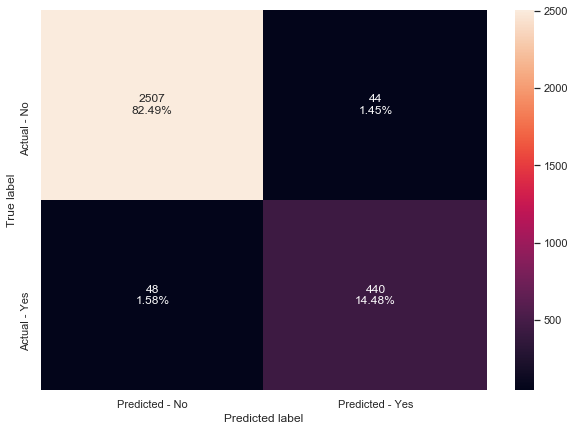

In [84]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

### Ada Boost - RandomizedSearchCV

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')} with CV score=0.876178618214972:
Wall time: 3min 39s


In [111]:
# Creating new pipeline with best parameters
abc_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "ABC",
            AdaBoostClassifier(
                
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
                

            ),
        ),
    ]
)
# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ABC',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=2,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                                                                          min_samples_leaf=1,
                                        

Accuracy on training set :  0.993510158013544
Accuracy on test set :  0.9677525501809806
Recall on training set :  0.974539069359087
Recall on test set :  0.8954918032786885
Precision on training set :  0.9849157054125999
Precision on test set :  0.9028925619834711


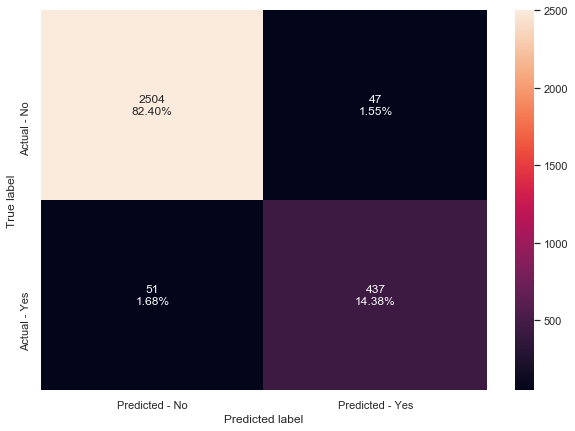

In [112]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- Grid search took 10 min to run and random search 3min. This difference is not so significant to increase as the number of parameters. Both has the same CV score.
- Test Recall has decreased on Random as compared to the test recall from Grid

### Bagging Classifier - GridSearch CV

In [89]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.8, 'baggingclassifier__max_samples': 0.7, 'baggingclassifier__n_estimators': 50} 
Score: 0.838425075676333
Wall time: 3min 7s


In [96]:
param_grid={'n_estimators':[10,15,20], 'max_samples':[0.7,0.8,0.9], 'max_features':[0.7,0.8,0.9]}

bcg = BaggingClassifier(random_state=1)

#Calling RandomizedSearchCV
clf = RandomizedSearchCV(estimator=bcg, param_distributions=param_grid, cv=5,
                         random_state=1, n_iter = 10)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=1.0, n_estimators=10,
                                               n_jobs=None, oob_score=False,
                                               random_state=1, verbose=0,
                                               warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'max_features': [0.7, 0.8, 0.9],
                                        'max_samples': [0.7, 0.8, 0.9],
                                        'n_estimators': [10, 15, 20]},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_

In [97]:
# Creating new pipeline with best parameters
bcg_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_samples= 0.7,
        max_features=0.8,
        n_estimators=50,
     
    ),
)

# Fit the model on training data
bcg_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=0.8,
                                   max_samples=0.7, n_estimators=50,
                                   n_jobs=None, oob_score=False,
                                   random_state=None, verbose=0,
                                   warm_start=False))],
         verbose=False)

Accuracy on training set :  0.9978837471783296
Accuracy on test set :  0.9644619940769991
Recall on training set :  0.9877085162423178
Recall on test set :  0.8463114754098361
Precision on training set :  0.9991119005328597
Precision on test set :  0.9260089686098655


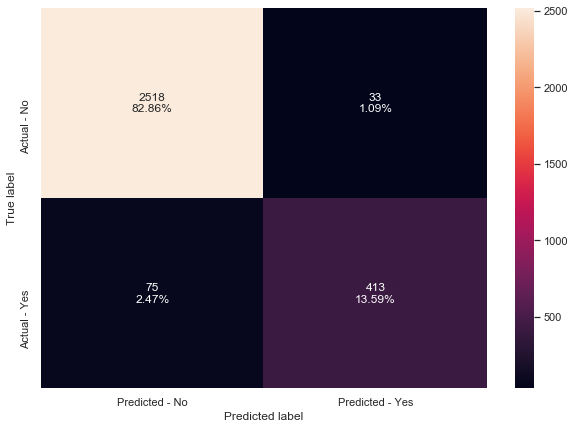

In [98]:
# Calculating different metrics
get_metrics_score(bcg_tuned1)

# Creating confusion matrix
make_confusion_matrix(bcg_tuned1, y_test)

### Bagging Classifier - RandomizedSearchCV

In [99]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
    
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
bcg_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
bcg_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(bcg_tuned2.best_params_,bcg_tuned2.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.7, 'baggingclassifier__max_features': 0.8} with CV score=0.838425075676333:
Wall time: 2min 39s


In [113]:
# Creating new pipeline with best parameters
bcg_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "BCG",
            BaggingClassifier(
                max_samples=0.7,
                n_estimators=50,
                max_features=0.8,
 
            ),
        ),
    ]
)
# Fit the model on training data
bcg_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('BCG',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=0.8,
                                   max_samples=0.7, n_estimators=50,
                                   n_jobs=None, oob_score=False,
                                   random_state=None, verbose=0,
                                   warm_start=False))],
         verbose=False)

Accuracy on training set :  0.9984480812641083
Accuracy on test set :  0.9654491609081934
Recall on training set :  0.990342405618964
Recall on test set :  0.8483606557377049
Precision on training set :  1.0
Precision on test set :  0.9303370786516854


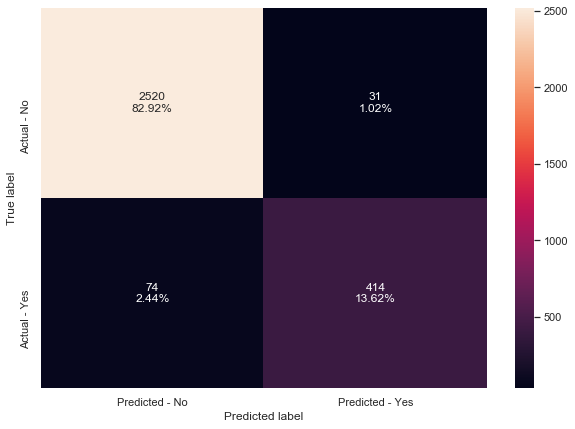

In [114]:
# Calculating different metrics
get_metrics_score(bcg_tuned2)

# Creating confusion matrix
make_confusion_matrix(bcg_tuned2, y_test)

- Grid search took 3 min to run and random search 2min 39sec. 
- There is a slight improvement on the Random as compared to the test recall from the grid

### Gradient Boosting - GridSearch CV

In [94]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {              
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1],
    
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.9, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 1} 
Score: 0.8770403246122584
Wall time: 4min 35s


In [103]:
param_grid={'n_estimators':[50,100,150], 'subsample':[0.8,0.9,1], 'max_features':[0.7,0.8,0.9]}

gbc = GradientBoostingClassifier(random_state=1)

#Calling RandomizedSearchCV
clf = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, cv=5,
                         random_state=1, n_iter = 10)

clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [104]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        subsample= 1,
        max_features=0.9,
        n_estimators=250,
     
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=0.9,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=250,
                                            n_iter_no_change=None,
                                            pre

Accuracy on training set :  0.9897009029345373
Accuracy on test set :  0.9759789404409345
Recall on training set :  0.9569798068481123
Recall on test set :  0.9098360655737705
Precision on training set :  0.9784560143626571
Precision on test set :  0.9386892177589852


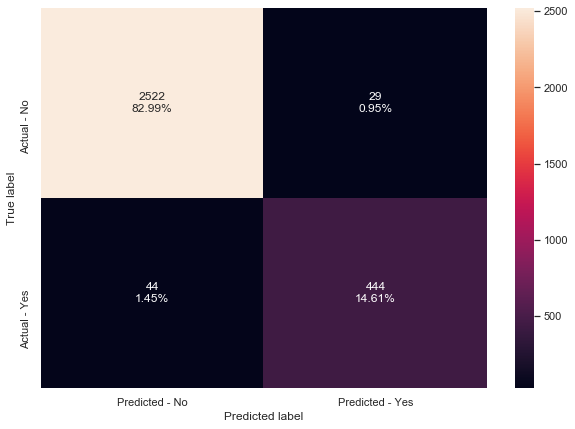

In [105]:
# Calculating different metrics
get_metrics_score(gbc_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

### Gradiente Boosting Classifier - RandomizedSearchCV

In [102]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
     "gradientboostingclassifier__n_estimators": [100,150,200,250],
     "gradientboostingclassifier__subsample":[0.8,0.9,1],
     "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1],
    
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gbc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbc_tuned2.best_params_,gbc_tuned2.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_features': 0.9} with CV score=0.8770403246122584:
Wall time: 4min 14s


In [109]:
# Creating new pipeline with best parameters
gbc_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "GBC",
            GradientBoostingClassifier(
                n_estimators=250,
                subsample=1,
                max_features=0.9,
                
            ),
        ),
    ]
)
# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('GBC',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=0.9,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=250,
                                            n_iter_no_change=None,
                                            presort='auto', random_state=None,

Accuracy on training set :  0.990265237020316
Accuracy on test set :  0.9779532741033234
Recall on training set :  0.9578577699736611
Recall on test set :  0.9139344262295082
Precision on training set :  0.9811151079136691
Precision on test set :  0.9469214437367304


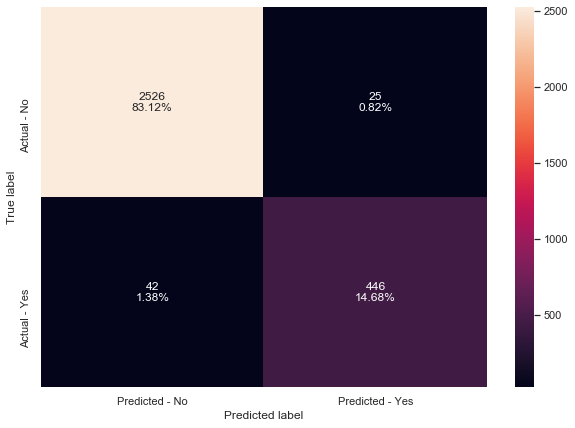

In [110]:
# Calculating different metrics
get_metrics_score(gbc_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

- Random search is giving better results than Grid search.
- The test recall and precision has increased as compared to the test recall from grid search.
- Gradiente Boosting Classifier - RandomizedSearchCV looks the best model so far

## Comparing all Models

In [115]:
# defining list of models
models = [d_tree, rf_estimator, bagging_classifier, ab_classifier, gb_classifier, abc_tuned1, abc_tuned2, bcg_tuned1, bcg_tuned2, gbc_tuned1,gbc_tuned2] 

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [116]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree",
            "Random Forest Classifier",
            "Bagging Classifier",
            "Ada Boost Classifier",
            "Gradient Boost Classifier",
            "Ada Boost with GridSearchCV",
            "Ada Boost with RandomizedSearchCV",
            "Bagging with GridSearchCV",
            "Bagging with RandomizedSearchCV",
            "Gradient Boost with GridSearchCV",
            "Gradient Boost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
10,Gradient Boost with RandomizedSearchCV,0.990265,0.977953,0.957858,0.913934,0.981115,0.946921
9,Gradient Boost with GridSearchCV,0.989701,0.975979,0.956980,0.909836,0.978456,0.938689
5,Ada Boost with GridSearchCV,0.988572,0.974992,0.949078,0.903689,0.979167,0.938298
6,Ada Boost with RandomizedSearchCV,0.993510,0.967753,0.974539,0.895492,0.984916,0.902893
4,Gradient Boost Classifier,0.975451,0.966436,0.888499,0.864754,0.955619,0.921397
3,Ada Boost Classifier,0.957111,0.956565,0.841089,0.848361,0.886216,0.877119
8,Bagging with RandomizedSearchCV,0.998448,0.965449,0.990342,0.848361,1.000000,0.930337
7,Bagging with GridSearchCV,0.997884,0.964462,0.987709,0.846311,0.999112,0.926009
2,Bagging Classifier,0.996332,0.959855,0.980685,0.840164,0.996432,0.903084
0,Decision Tree,1.000000,0.937808,1.000000,0.827869,1.000000,0.793713


- The Gradient Boost with RandomizedSearch CV model is giving the best test recall of 0.91. Also shows high train and test precision.


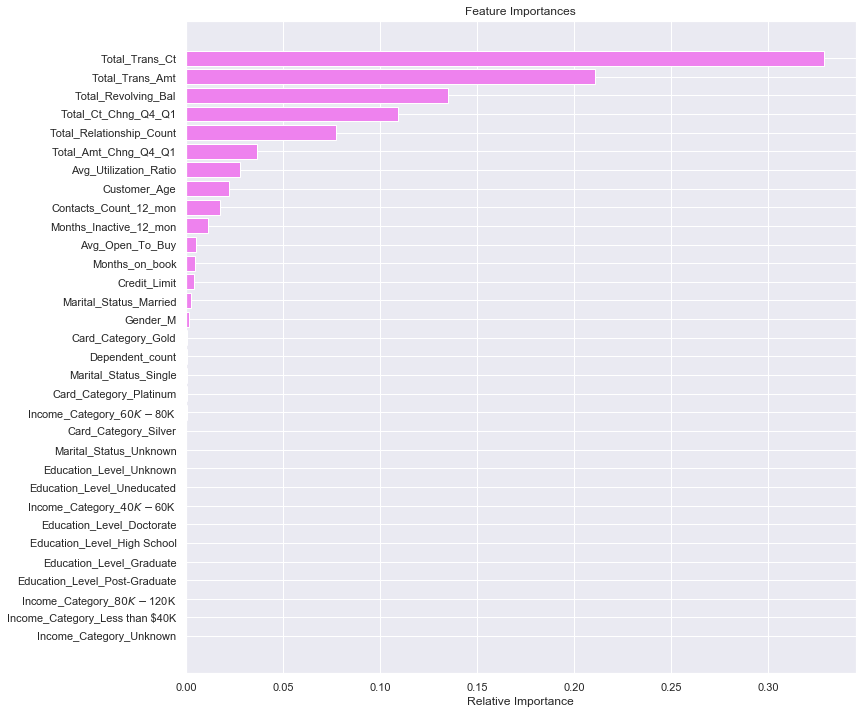

In [117]:
feature_names = X_train.columns
importances = gbc_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total Transactions Count  is the most important feature, followed by Total Transaction Amount and Total Revolving Balance of the customer.
- Education Level and Income Category are not important values for this purpose.

## Business Recomendation

- Very different from what was expected, Income is not an important factor, which is why it is recommended to value existing customers, regardless of Income, education or marital status.
- Existing customers who transact frequently need to be valued and recognized for their loyalty. These same customers can bring in new customers.
- We observed on this analysis how customer is changing Transactions Count and Amount. It will be important to review whether these changes are for greater consumption or less consumption, thus being able to review rates and promotions.
- A more detailed analysis of the customer's age can direct marketing that is more focused on the younger or older population.
- The inactive period can be a worrying factor, so it is recommended a better view of this client who is still a user but is not active